# Physics 240 - Assignment 1

DISCLAIMER : For the sake of my sanity, I have only written down my final answers here but all the working is on paper which I have scanned and attached. Sorry for the inconvenience.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import math

## Problem 1 : Supernovae Explosions

### Part a.)

$$ ln(L) = NA - N \Delta t \[\sum_{i=1}^{N} R(t) \] + \[\sum_{i=1}^{N} ln(R(t)) \] - \[\sum_{j=1}^{n_{bins}-N}R(t)\Delta t \] $$

where $A = ln(\Delta t)$ is an additive constant and $n_{bins} = \frac{t_{SN}}{\Delta t} $ to separate the sums.

### Part b.)

$$ ln(L) = - \[\sum_{i=1}^{N} \frac{t_{i} - t_{SN}}{\tau} \] + N ln(\frac{F_{0}}{\tau}) - F_{0} + NA $$

### Part c.)

$$ F_{0, max} = N $$

$$ \tau_{max} = \frac{1}{N} \[\sum_{i=1}^{N} t_{i} - t_{SN \] $$

$$ - \[\sum_{i=1}^{N} \frac{-1}{\tau} \] = 0 : \tau = \infty $$

### Part d.)

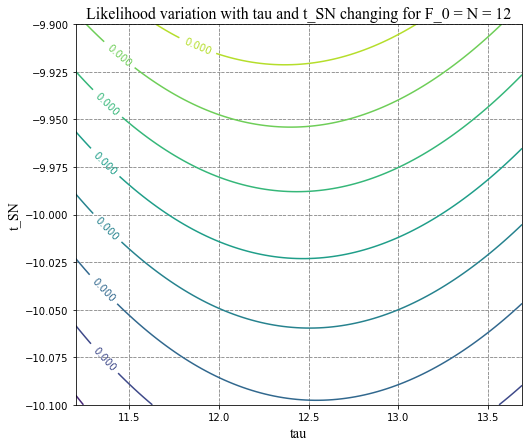

4.36519944141426e-15


In [4]:
t_i_list = [0, 0.1, 0.15, 0.3, 0.5, 0.9, 1.55, 1.7, 3, 5, 7, 9.15]
N = 12

def likelihood(t_SN, tau):
    F_0 = N

    to_sum = []
    for t_i in t_i_list:
        temp = (t_i - t_SN) / tau
        to_sum.append(temp)

    L = np.exp(N*np.log(F_0/tau) - np.sum(to_sum) - F_0)

    return L

# Making the two meshes of tau and t_SN values
t_SN_trial = -10
t_SN_step = 0.1
tau_trial = 1/N * np.sum([t_i - t_SN_trial for t_i in t_i_list])
tau_step = tau_trial / 10

tau_tests = np.linspace(tau_trial + tau_step, tau_trial - tau_step, 100)
t_SN_tests = np.linspace(t_SN_trial + t_SN_step, t_SN_trial - t_SN_step, 100)

tau_mesh = np.empty((0, len(tau_tests)))
for _ in range(len(t_SN_tests)):
    tau_mesh = np.vstack((tau_mesh, tau_tests))

t_SN_mesh = np.empty((0, len(t_SN_tests)))
for _ in range(len(tau_tests)):
    t_SN_mesh = np.vstack((t_SN_mesh, t_SN_tests))
t_SN_mesh = np.transpose(t_SN_mesh)

# Making the likelihood mesh using these values
likelihood_func = np.vectorize(likelihood)
likelihood_mesh = likelihood_func(t_SN_mesh, tau_mesh)
test = likelihood(t_SN_mesh[0][0], tau_mesh[0][0])

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
cs = ax.contour(tau_mesh, t_SN_mesh, likelihood_mesh)
ax.clabel(cs, inline=1, fontsize=10)
ax.set_title('Likelihood variation with tau and t_SN changing for F_0 = N = 12', fontsize=16, fontname='Times New Roman')
ax.set_ylabel('t_SN', fontsize=14, fontname='Times New Roman')
ax.set_xlabel('tau', fontsize=14, fontname='Times New Roman')
ax.grid(True, color='grey', dashes=[4, 1, 4, 2])
plt.show()

# This should be one
print(np.sum(likelihood_mesh.flatten()))

I don't know how to do it since I think there is something wrong with my likelihood values, but I think the general idea for the contour levels is to find the inverse sum of the flattened likelihood mesh to find the values that give sum = 0.683, 0.954, 0.997.

### Part e.)

$$ L(d|H, t_{SN}) = P(F_{0}, \tau | H, t_{SN}) C N! (N-2)! (\[\sum_{i=1}^{N} t_{i} - t_{SN \])^{1-N} $$

where $ P(F_{0}, \tau | H, t_{SN}) $ are the priors for $ F_{0} $ and $ \tau $ and are considered to be uniform and $ C = e^{NA} $ is a constant.

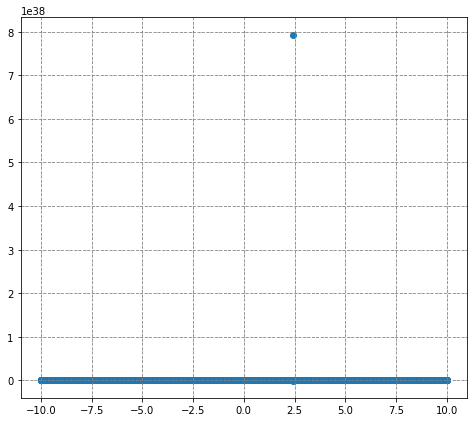

In [189]:
def likelihood_t_SN(t_SN):

    to_sum = []
    for t_i in t_i_list:
        to_sum.append(t_i - t_SN)

    return math.factorial(N) * math.factorial(N-2) * np.power(np.sum(to_sum), 1-N)

t_SN_range = np.linspace(-10, 10, 10000)
tau = 100

likelihood_t_SN_vals = []
for t_SN_val in t_SN_range:
    likelihood_t_SN_val = likelihood_t_SN(t_SN_val)
    likelihood_t_SN_vals.append(likelihood_t_SN_val)

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
ax.scatter(t_SN_range, likelihood_t_SN_vals)
ax.grid(True, color='grey', dashes=[4, 1, 4, 2])
plt.show()

## Problem 2 : Detection in Gaussian Noise

### Part a.)

$$ T' = ln(T) = \[\sum_{i=1}^{N} \frac{\mu_{i} (2x_{i} - \mu_{i})}{2 \sigma_{i}^2 \] $$

### Part b.)

$$ H_{0} : T' \sim N( - \[\sum_{i=1}^{N} \frac{\mu_{i}^2}{2\sigma_{i}^2} \] , \[\sum_{i=1}^{N} \frac{\mu_{i}^2}{\sigma_{i}^2} \]) $$

$$ H_{1} : T' \sim N( \[\sum_{i=1}^{N} \frac{\mu_{i}^2}{2\sigma_{i}^2} \] , \[\sum_{i=1}^{N} \frac{\mu_{i}^2}{\sigma_{i}^2} \]) $$

### Part c.)

$$ SNR = \sqrt{ \[\sum_{i=1}^{N} \frac{\mu_{i}^2}{\sigma_{i}^2} \] } $$

$$ H_{0} : T' \sim N(0, 1) $$
$$ H_{1} : T' \sim N(SNR, 1) $$

$$ \alpha = \[ \int_{\eta}^{\infty} \frac{1}{\sqrt{2\pi}} e^{\frac{-x^2}{2}} \,dx \] $$

$$ \beta = \[ \int_{SNR - \eta}^{\infty} \frac{1}{\sqrt{2\pi}} e^{\frac{-y^2}{2}} \,dy \] $$

### Part d.)

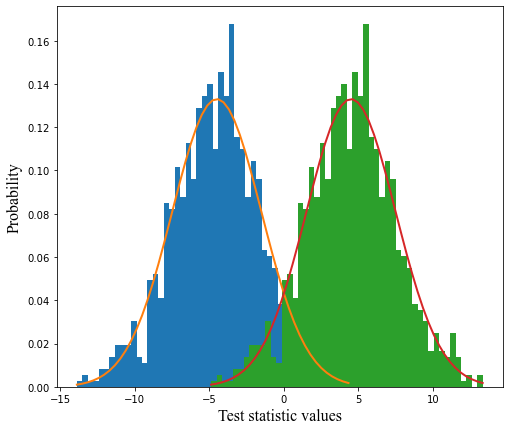

In [104]:
N = 512
sigma_i = 1

def mu_i(i):
    return 3 / (2*np.pi * 20**2)**0.25 * np.exp(- (i - 256)**2 / (4 * 20**2))

def normal_dist(x, mean, var):
    return 1 / np.sqrt(2*np.pi*var) * np.exp(- (x - mean)**2 / (2 * var))

mu_i_list = []
for j in range(1, N+1):
    mu_i_list.append(mu_i(j))

# Finding the test statistics for many runs of the data (chose 1000)

T_H0_vals = []
T_H1_vals = []

for trial in range(1000):
    n_i_list = 0 + sigma_i * np.random.randn(N)

    xi_H0 = n_i_list
    xi_H1 = n_i_list + mu_i_list

    to_sum_T_H0 = []
    for index, xi in enumerate(xi_H0):
        temp = 1 / (2*sigma_i) * mu_i_list[index] * (2*xi - mu_i_list[index])
        to_sum_T_H0.append(temp)
    T_H0 = np.sum(to_sum_T_H0)
    T_H0_vals.append(T_H0)

    to_sum_T_H1 = []
    for index, xi in enumerate(xi_H1):
        temp = 1 / (2*sigma_i) * mu_i_list[index] * (2*xi - mu_i_list[index])
        to_sum_T_H1.append(temp)
    T_H1 = np.sum(to_sum_T_H1)
    T_H1_vals.append(T_H1)

# Plotting the empirical values as well as the derived distributions

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)

_, bins_H0, _ = ax.hist(T_H0_vals, 50, density=True)
mean_H0 = - np.sum([mu_i(j)**2 / (2 * 1**2) for j in range(1, N+1)])
var_H0 = np.sum([mu_i(j)**2 / (1**2) for j in range(1, N+1)])
ax.plot(bins_H0, normal_dist(bins_H0, mean_H0, var_H0), linewidth=2)

_, bins_H1, _ = ax.hist(T_H1_vals, 50, density=True)
mean_H1 = np.sum([mu_i(j)**2 / (2 * 1**2) for j in range(1, N+1)])
var_H1 = np.sum([mu_i(j)**2 / (1**2) for j in range(1, N+1)])
ax.plot(bins_H1, normal_dist(bins_H1, mean_H1, var_H1), linewidth=2)

ax.set_xlabel('Test statistic values', fontsize=16, fontname='Times New Roman')
ax.set_ylabel('Probability', fontsize=16, fontname='Times New Roman')

plt.show()

### Part e.)

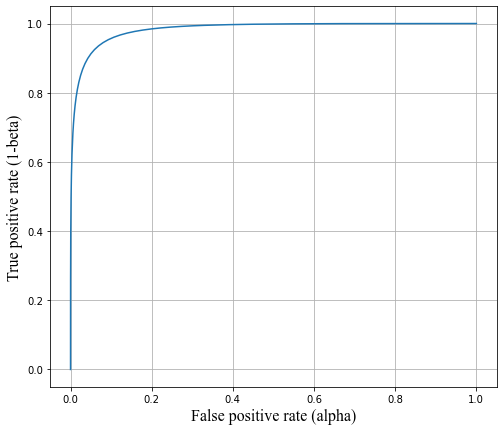

In [168]:
# Taking -20 to 20 is effectively -inf to inf in this case
eta_vals = np.linspace(-20, 20, 500)

snr = (mean_H1 - mean_H0) / np.sqrt(var_H1)

alpha_vals = scipy.stats.norm.sf(eta_vals)
beta_vals = scipy.stats.norm.sf(snr-eta_vals)

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
ax.plot(alpha_vals, 1 - beta_vals)
ax.set_xlabel('False positive rate (alpha)', fontsize=16, fontname='Times New Roman')
ax.set_ylabel('True positive rate (1-beta)', fontsize=16, fontname='Times New Roman')
ax.grid(True)
plt.show()

### Part f.)

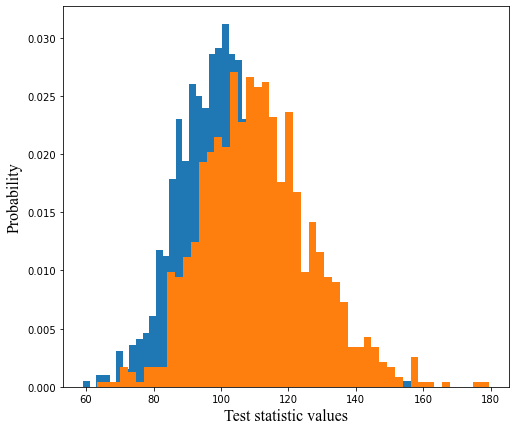

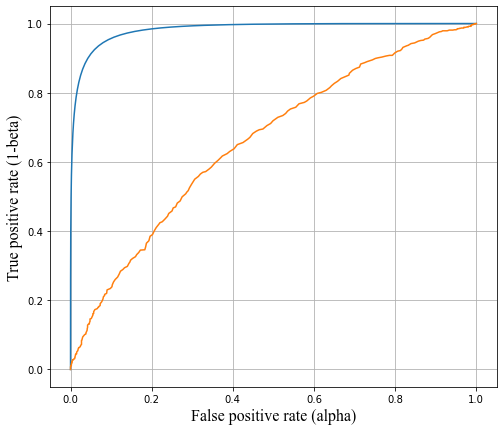

At a fixed false alarm rate of 1%, the true positive rate in each case is:
Mine: 0.7373740083834172
Friend: 0.03300000000000003


In [167]:
mu_i_list = []
for j in range(256-50, 256+50+1):
    mu_i_list.append(mu_i(j))

T_H0_vals = []
T_H1_vals = []

for trial in range(1000):
    n_i_list = 0 + sigma_i * np.random.randn(101)

    xi_H0 = n_i_list
    xi_H1 = n_i_list + mu_i_list

    T_H0 = np.sum(np.power(xi_H0, 2))
    T_H0_vals.append(T_H0)
    T_H1 = np.sum(np.power(xi_H1, 2))
    T_H1_vals.append(T_H1)

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
_, bins_H0, _ = ax.hist(T_H0_vals, 50, density=True)
_, bins_H1, _ = ax.hist(T_H1_vals, 50, density=True)
ax.set_xlabel('Test statistic values', fontsize=16, fontname='Times New Roman')
ax.set_ylabel('Probability', fontsize=16, fontname='Times New Roman')
plt.show()

eta_vals = np.linspace(50, 200, 500)

alpha_vals_f = []
one_minus_beta_vals_f = []
for eta_val in eta_vals:
    significant_vals = [val for val in T_H0_vals if val > eta_val]
    alpha_val = len(significant_vals) / len(T_H0_vals)
    alpha_vals_f.append(alpha_val)

    significant_vals = [val for val in T_H1_vals if val < eta_val]
    beta_val = len(significant_vals) / len(T_H1_vals)
    one_minus_beta_vals_f.append(1-beta_val)

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(111)
ax.plot(alpha_vals, 1 - beta_vals)
ax.plot(alpha_vals_f, one_minus_beta_vals_f)
ax.set_xlabel('False positive rate (alpha)', fontsize=16, fontname='Times New Roman')
ax.set_ylabel('True positive rate (1-beta)', fontsize=16, fontname='Times New Roman')
ax.grid(True)
plt.show()

alpha_vals = np.array(alpha_vals)
alpha_vals_f = np.array(alpha_vals_f)

alpha_threshold_index_best = np.argmin(np.power(0.01-alpha_vals, 2))
alpha_threshold_index_friend = np.argmin(np.power(0.01-alpha_vals_f, 2))

print("At a fixed false alarm rate of 1%, the true positive rate in each case is:")
print(f"Mine: {1 - beta_vals[alpha_threshold_index_best]}")
print(f"Friend: {one_minus_beta_vals_f[alpha_threshold_index_friend]}")
